In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nnlib.models.sequential import SequentialModel
from nnlib.layers.dense import Dense
from nnlib.activation_functions.relu import ReLu
from nnlib.activation_functions.leaky_relu import LeakyReLu
from nnlib.activation_functions.sigmoid import Sigmoid 
#from nnlib.activation_functions.softmax import Softmax
from nnlib.loss_functions.bce import BinaryCrossEntropy
from nnlib.loss_functions.mse import MeanSquaredError
#from nnlib.loss_functions.cce import CategoricalCrossEntropy
from nnlib.optimization_functions.adam import AdaptiveMomentEstimation
from nnlib.initialization_functions.he import He

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import tensorflow as tf
from tensorflow import keras

In [3]:
# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]


c:\Programs\Anaconda3\envs\ivc\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:

# Convert labels to integers
X = np.array(X).astype(np.float32)
X = X/255.0
y = np.array(y).astype(np.uint8).reshape(-1, 1)
# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y)

# Split the data into training (60%) and temporary (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.4, random_state=42)

# Split the temporary set equally into testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

c:\Programs\Anaconda3\envs\ivc\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20 - loss: 0.4873 - val_loss: 0.2983
Epoch 2/20 - loss: 0.2426 - val_loss: 0.1952
Epoch 3/20 - loss: 0.1606 - val_loss: 0.1349
Epoch 4/20 - loss: 0.1181 - val_loss: 0.1067
Epoch 5/20 - loss: 0.0975 - val_loss: 0.0917
Epoch 6/20 - loss: 0.0856 - val_loss: 0.0822
Epoch 7/20 - loss: 0.0775 - val_loss: 0.0755
Epoch 8/20 - loss: 0.0715 - val_loss: 0.0704
Epoch 9/20 - loss: 0.0669 - val_loss: 0.0663
Epoch 10/20 - loss: 0.0630 - val_loss: 0.0628
Epoch 11/20 - loss: 0.0598 - val_loss: 0.0599
Epoch 12/20 - loss: 0.0569 - val_loss: 0.0572
Epoch 13/20 - loss: 0.0544 - val_loss: 0.0550
Epoch 14/20 - loss: 0.0521 - val_loss: 0.0529
Epoch 15/20 - loss: 0.0501 - val_loss: 0.0511
Epoch 16/20 - loss: 0.0484 - val_loss: 0.0495
Epoch 17/20 - loss: 0.0467 - val_loss: 0.0480
Epoch 18/20 - loss: 0.0452 - val_loss: 0.0467
Epoch 19/20 - loss: 0.0438 - val_loss: 0.0455
Epoch 20/20 - loss: 0.0425 - val_loss: 0.0443


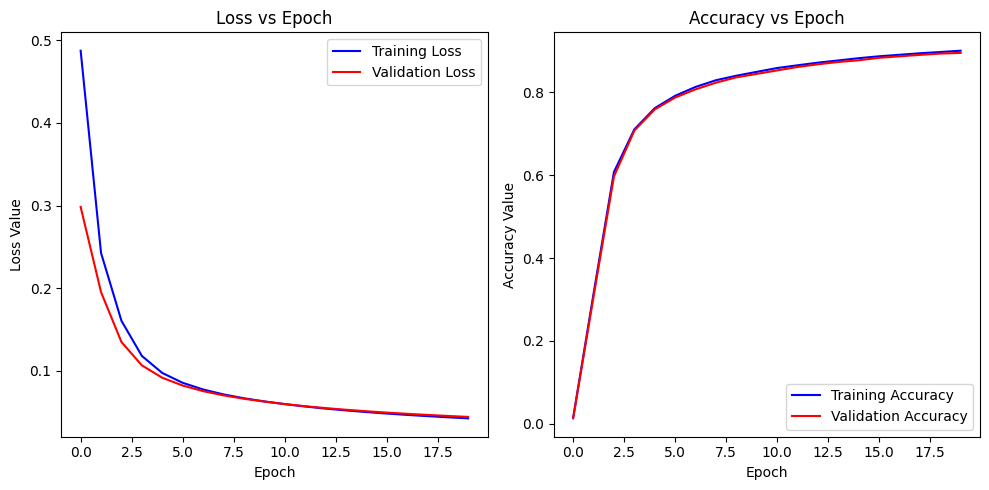

In [6]:

model = SequentialModel()

model.add(Dense(n_units= 128, input_dim=784, activation=ReLu()))
model.add(Dense(n_units= 128, input_dim=128, activation=ReLu()))
model.add(Dense(n_units = 10, input_dim = 128, activation=Sigmoid()))

model.compile(optimizer=AdaptiveMomentEstimation(0.0001, dropout=0.2),
              loss=BinaryCrossEntropy(),
              initializer=He())

model.fit(X_train, y_train, epochs=20, batch_size=512, X_val=X_test, y_val=y_test, verbose=True, plot_histograms=False)

In [ ]:

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test), verbose=1)
model.evaluate(X_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.show()

In [ ]:
dropout = .2
weights = np.random.randn(10, 10)

qty_dropouts = int(len(weights) * dropout)
idx_dropouts = np.random.randint(0, len(weights), qty_dropouts)

In [ ]:
1 in idx_dropouts